# Debobrata Chakraborty


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 35kB/s 


In [ ]:
# import  libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3 # inception v3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob

In [ ]:

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Animal-10/train'
test_path = '/content/drive/MyDrive/Dataset/Animal-10/test'

In [ ]:
# Import the Inception library ,adding preprocessing layer to the front of Inception
# using imagenet weights
                                    #  [224,244,3]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# not to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/Animal-10/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/Animal-10/train/ragno',
 '/content/drive/MyDrive/Dataset/Animal-10/train/elefante',
 '/content/drive/MyDrive/Dataset/Animal-10/train/scoiattolo',
 '/content/drive/MyDrive/Dataset/Animal-10/train/cavallo',
 '/content/drive/MyDrive/Dataset/Animal-10/train/mucca',
 '/content/drive/MyDrive/Dataset/Animal-10/train/cane',
 '/content/drive/MyDrive/Dataset/Animal-10/train/farfalla',
 '/content/drive/MyDrive/Dataset/Animal-10/train/pecora',
 '/content/drive/MyDrive/Dataset/Animal-10/train/gatto',
 '/content/drive/MyDrive/Dataset/Animal-10/train/gallina']

In [ ]:
labels=["dog","horse",  "elephant",  "butterfly", "chicken", "cat", "cow",  "sheep","spider" ,"squirrel"]

# Model

In [ ]:
#  layers
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:

#  cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Image data preprocessing

---



In [ ]:
#  Image Data Generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,   #  0-255 color , R= 166 /255 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Animal-10/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 25963 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Animal-10/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 160 images belonging to 10 classes.


## **Train**

---



In [ ]:
# fit the model
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.1):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[callbacks]
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
812/812 [==============================] - 14500s 18s/step - loss: 1.9622 - accuracy: 0.8773 - val_loss: 9.9196 - val_accuracy: 0.8125
Epoch 2/5
812/812 [==============================] - 2175s 3s/step - loss: 1.4723 - accuracy: 0.9445 - val_loss: 15.5151 - val_accuracy: 0.8562
Epoch 3/5
812/812 [==============================] - 2173s 3s/step - loss: 1.3051 - accuracy: 0.9559 - val_loss: 17.5612 - val_accuracy: 0.8687
Epoch 4/5
812/812 [==============================] - 2165s 3s/step - loss: 1.5583 - accuracy: 0.9532 - val_loss: 20.4155 - val_accuracy: 0.8687
Epoch 5/5
812/812 [==============================] - 2171s 3s/step - loss: 1.2874 - accuracy: 0.9619 - val_loss: 14.4670 - val_accuracy: 0.8750


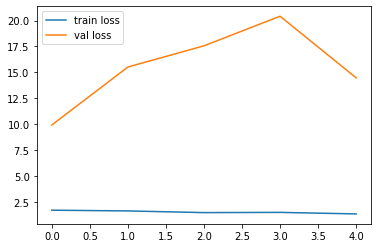

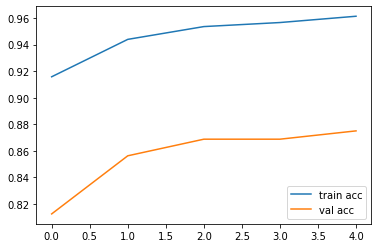

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


**Predict**

---



In [ ]:
y_pred = model.predict(test_set)

y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.1234164e-38, 0.0000000e+00, 9.4005543e-30, ..., 6.0816910e-30,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
y_pred.shape

(160, 10)

In [ ]:
def plot_value_array( predictions_array, true_label):
  
  plt.grid(False)
  plt.xticks(range(10),true_label)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')

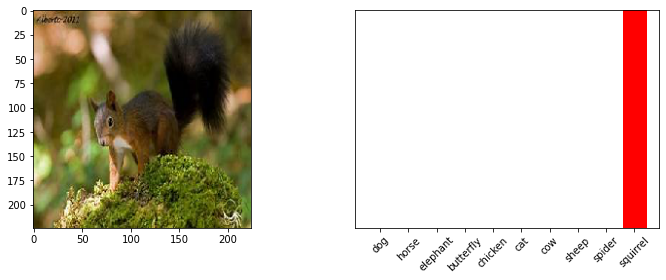

In [ ]:
plt.figure(figsize=(12,4))

img_path = '/content/drive/MyDrive/Dataset/Animal-10/test/scoiattolo/OIP-0FHHBZQRsahkBa3TGgOA1QHaE8.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)

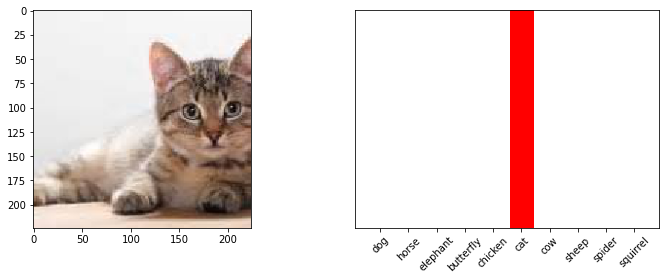

In [ ]:
plt.figure(figsize=(12,4))

img_path = '/content/drive/MyDrive/Dataset/Animal-10/test/mucca/100.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

#img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)

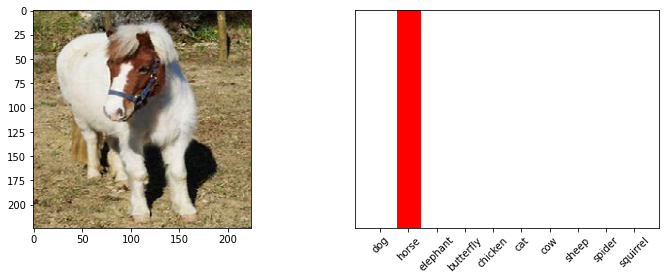

In [ ]:
plt.figure(figsize=(12,4))

img_path = '/content/drive/MyDrive/Dataset/Animal-10/test/cavallo/OIP-1aNogzI0DBdhhRs-r1vYXwHaJW.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)